**以下所有的代码块都是这样**
- 当提示 Ready! 后
    - 按 T 开始
    - 按 P 结束

# 1 游戏设置

- 打开游戏 《只狼：影逝二度》
    - 设定
        - 显示和声音
            - **亮度调整**
                - 设置 5
        - 按键设置
            - 移动
                - 移动 前
                    - 设置 W
                - 移动 后
                    - 设置 S
                - 移动 左
                    - 设置 A
                - 移动 右
                    - 设置 D
                - 垫步、（长按）冲刺
                    - 设置 .Shift
                - 跳跃
                    - 设置 Space
            - 视角操作
                - 重置视角/固定目标
                    - 设置 Y
            - 攻击动作
                - **攻击**
                    - 设置 J
                - 使用义手忍具
                    - 设置 .Ctrl
                - **防御**
                    - 设置 K
                - 钩绳
                    - 设置 F
                - 使用道具
                    - 设置 R
        - 图像设定
            - **屏幕模式**
                - 窗口
            - **屏幕分辨率**
                - 1280 x 720
            - 自动绘图调整
                - OFF
            - 质量设定
                - 低

### 校准游戏窗口位置

- 将游戏窗口放在左上方  
![example_01.png](https://github.com/ricagj/pysekiro/blob/main/imgs/example_01.png?raw=true?raw=true)

运行以下代码，然后根据弹出来的窗口调整游戏窗口的位置

In [ ]:
from pysekiro.img_tools.adjustment import main

main()

还是不懂的话，就看这个gif https://github.com/ricagj/pysekiro/blob/main/imgs/adjustment.gif

![adjustment.png](https://github.com/ricagj/pysekiro/blob/main/imgs/adjustment.png?raw=true)

# 2 开始

~~~python
class Play_Sekiro:
    def __init__(
        self,
        load_weights_path=None,
        save_weights_path=None,
        load_memory_path=None,
        save_memory_path=None,
    ):
~~~

- **load_weights_path** 指定模型权重参数加载的路径。默认为None，不加载。
- **save_weights_path** 指定模型权重参数保存的路径。默认为None，不保存。**注：默认也是测试模式，若设置该参数，就会开启训练模式**
- **load_memory_path** 指定记忆加载的路径。默认为None，不加载。
- **save_memory_path** 指定记忆保存的路径。默认为None，不保存。

In [1]:
from pysekiro.train import Play_Sekiro

GeForce GTX 970M


In [2]:
target = 'Genichiro_Ashina' # 苇名弦一郎
# target = 'Inner_Genichiro' # 心中的弦一郎
# target = 'Isshin,_the_Sword_Saint' # 剑圣一心
# target = 'Inner_Isshin' # 心中的一心

In [3]:
train = Play_Sekiro(
#     load_weights_path = target + '_w.h5',    # 注释这行就不加载模型，从零开始
    save_weights_path = target + '_w.h5',    # 注释这行就不保存模型，并变成测试模式
#     load_memory_path = target + '_memory.json',    # 注释这行就不加载记忆
    save_memory_path = target + '_memory.json',    # 注释这行就不保存记忆
)

Ready!

Starting!
step:  6530. Loop took 0.185 seconds. action 3, Self HP: 410, Self Posture:  90, Target HP: 170, Target Posture:   2. , total_reward:  -423.400, memory:6529.

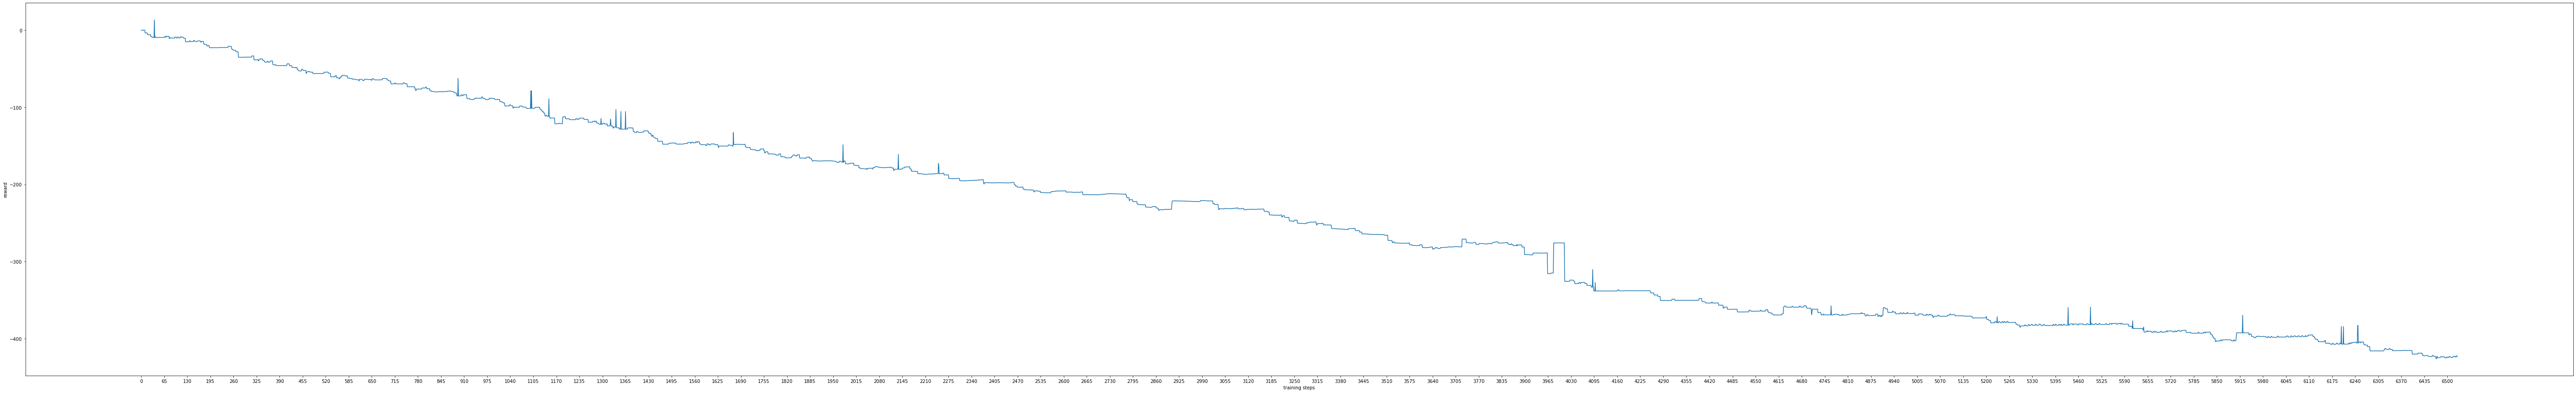


Done!


In [4]:
train.run()